<a href="https://colab.research.google.com/github/Sara19598/Seoul-Bike-Rental-Prediction---ML-Supervised/blob/main/BIKE_RENTAL_PREDICTION__TEAM_COLAB_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#loading the Required libraries-
import pandas as pd                 #Extensively used to load and wrangle with the dataset.
import numpy as np                  #For some math operations in predictions
import matplotlib.pyplot as plt     #Used for visualization.
import seaborn as sns               #Used for visualization.
import missingno as mno             #install  pip install missingno
import warnings                     #For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
from datetime import date           #Used for analysing the date variable
from scipy import stats             #used for statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor        #For Multicolinearity
from sklearn.model_selection import train_test_split
import os


In [ ]:
# Mounting Drive to access the dataset file-
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Data set of csv file-
bike_df=pd.read_csv('/content/drive/MyDrive/Bike Rental Prediction - Poonam Shevkar/SeoulBikeData.csv',encoding='ISO-8859-1')

# ***Data Summary***

- Size of the dataset.
- Printing few rows of it.
- What type of feature in our dataset.

In [ ]:
#To view the dataset -
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Shape of the dataset
bike_df.shape

(8760, 14)

In [ ]:
#To get the columns of the dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# number of unique values that each column contains
bike_df.nunique()

NameError: ignored

In [ ]:
#showing the datatype of all features
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Summary of the dataset
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
#Missing values in dataset
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

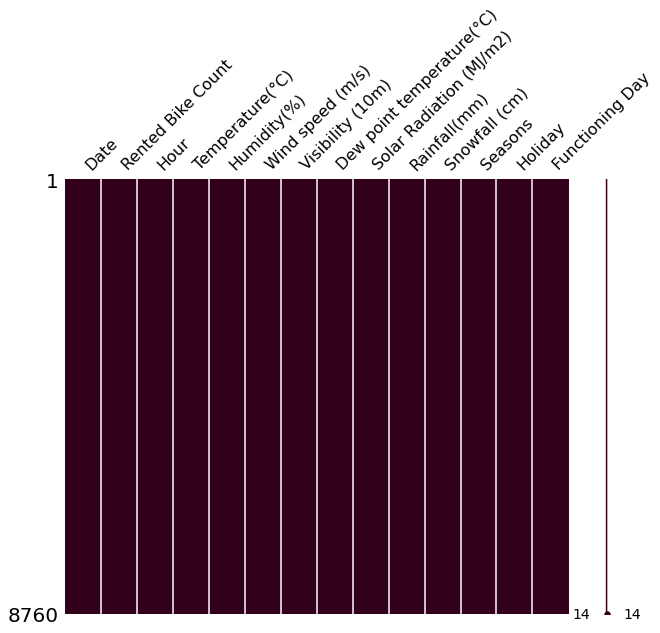

In [ ]:
#checking for nan values
mno.matrix(bike_df,figsize=(10,8),color=(0.2, 0.0, 0.11))

***Comment:- There is no missing values in dataset.***

## **Conversion of Date column using Datetime type-**

In [ ]:
bike_df.Date = pd.to_datetime(bike_df.Date, format="%d/%m/%Y")

In [ ]:
# To convert data format in separate variable as date, year and month
bike_df['Date'] = pd.to_datetime(bike_df['Date'])
bike_df['Year'] =bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Day'] = bike_df['Date'].dt.day
bike_df.insert(4, 'WeekDay',bike_df["Date"].dt.day_name())

In [ ]:
#Dataframe after adding the columns of Year,Month and Day-
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),WeekDay,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,2017-12-01,254,0,-5.2,Friday,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,Friday,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,Friday,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,Friday,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,Friday,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


### **Feature Engineering-**


**Rename Columns to call columns by dot**

In [ ]:
bike_df.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*bike_df.columns]]
bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Weekday',
       'Humidity', 'Wind_Speed', 'Visibility', 'Dew_Point_Temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday',
       'Functioning_Day', 'Year', 'Month', 'Day'],
      dtype='object')

# ***Data*** **Visualization-**





### **Seperating the dependent and independent variables**

In [ ]:
dependent_variable ='Rented Bike Count'

In [ ]:
independent_variables = list(set(bike_df.columns.tolist())-{dependent_variable})
independent_variables

['Day',
 'Rented_Bike_Count',
 'Year',
 'Hour',
 'Holiday',
 'Month',
 'Date',
 'Visibility',
 'Wind_Speed',
 'Weekday',
 'Snowfall',
 'Temperature',
 'Seasons',
 'Functioning_Day',
 'Solar_Radiation',
 'Dew_Point_Temperature',
 'Humidity',
 'Rainfall']

## **Visualize the features of the dataset-**

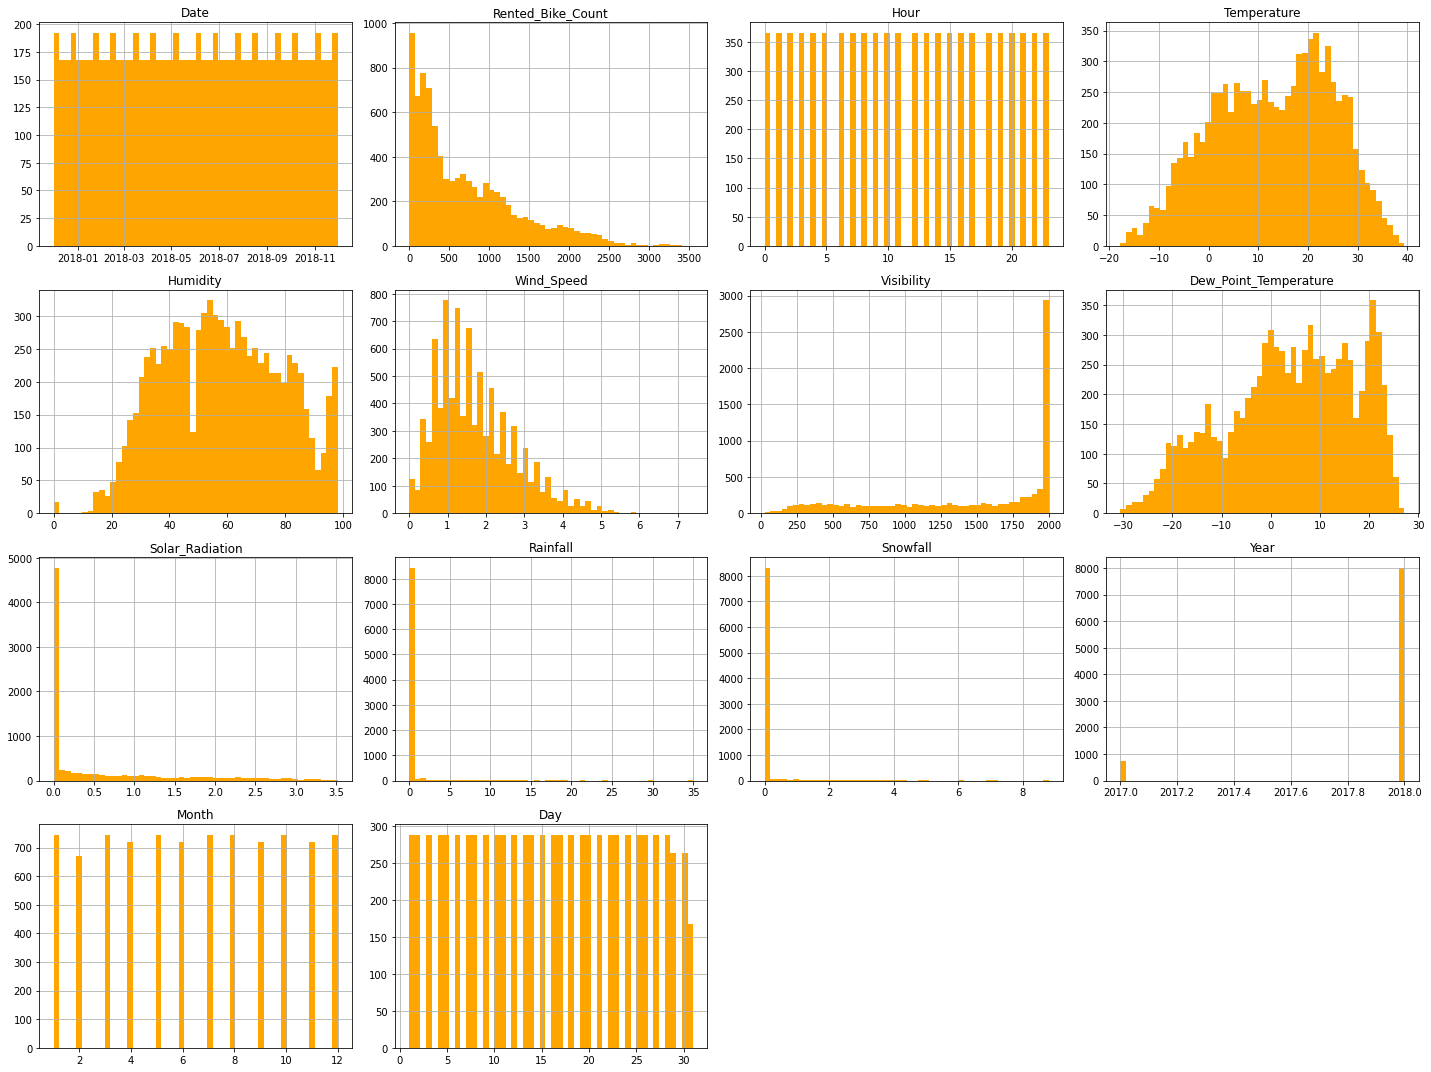

In [ ]:
#We can plot histogram of the column features i.e. independent & dependent features
# a histogram plot for each numerical attribute
bike_df.hist(bins=50, figsize=(20,15),color='orange')
plt.tight_layout()
plt.show()

***Comment:- In this, we summarize the pattern of numerical features data.***

## **Feature Distribution-**

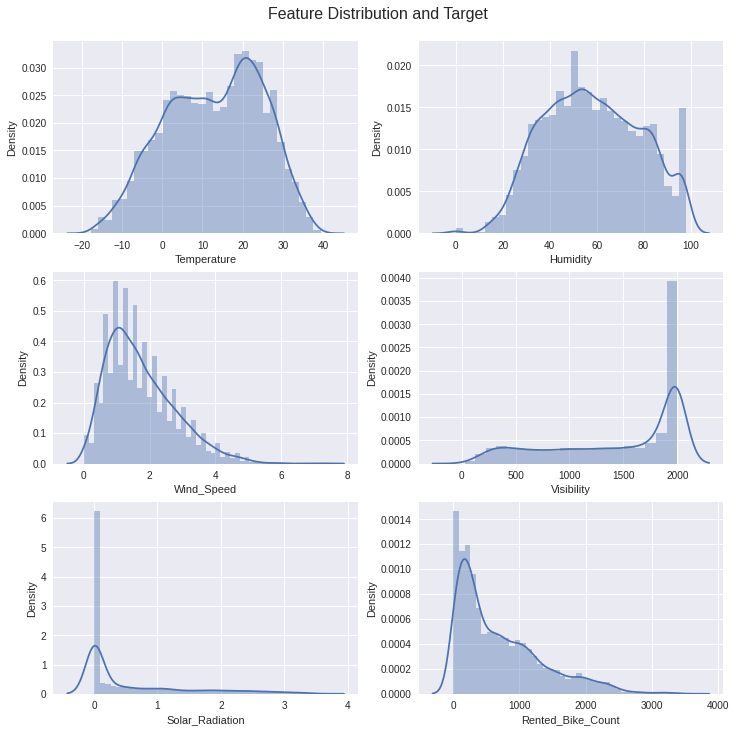

In [ ]:
# set style of plot backgroud.
plt.style.use('seaborn')

# create subplot contain 6 plots (2 plot for 3 rows)
fig, ax = plt.subplots(3,2, figsize=(12,12))

# set title for figure
fig.suptitle('Feature Distribution and Target', fontsize=16, y=0.92)

# draw histogram for feature and  best fit line.
sns.distplot(bike_df.Temperature, ax=ax[0][0])
sns.distplot(bike_df.Humidity, ax=ax[0][1])
sns.distplot(bike_df.Wind_Speed, ax=ax[1][0])
sns.distplot(bike_df.Visibility, ax=ax[1][1])
sns.distplot(bike_df.Solar_Radiation, ax=ax[2][0])
sns.distplot(bike_df.Rented_Bike_Count, ax=ax[2][1])
plt.show()

***Comment:- The above plot shows that the distribution of Wind speed, Solar Radiation , Rented bike count are positively skewed whereas visibility is negatively skewed.Also, Temperature and Humidity are nearly normally distributed.***

### ***Best Fitting Line Between Feature And Target-***

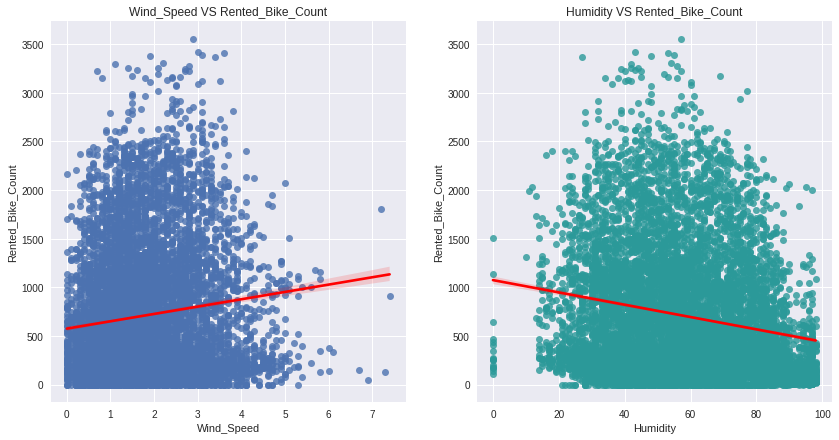

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(14, 7)
g1 = sns.regplot(x='Wind_Speed', y="Rented_Bike_Count", 
                 data=bike_df,ax=ax1,
                 line_kws={'color': 'red'})

g1.set_title('Wind_Speed VS Rented_Bike_Count')
g2 = sns.regplot(x='Humidity', y="Rented_Bike_Count",
                 data=bike_df,ax=ax2,
                 color="#2b9999",
                 line_kws={'color': 'red'})

g2.set_title('Humidity VS Rented_Bike_Count')
plt.show()

***Comment:- The best fit line describes- When there is Low Wind speed the rented bike count is maximum or populated.And, as humidity level decreases the count of rented bike increases.***

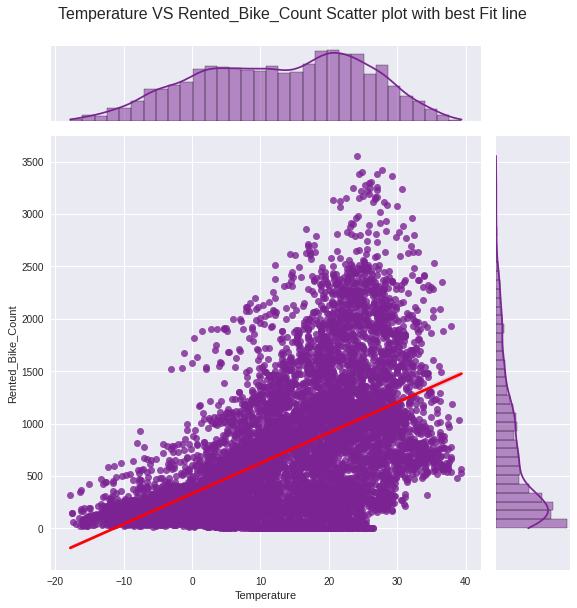

In [ ]:
g = sns.jointplot(x="Temperature", y="Rented_Bike_Count", data=bike_df, kind='reg',color="#7c2394",height=8)
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
g.fig.suptitle("Temperature VS Rented_Bike_Count Scatter plot with best Fit line", y=1.05, fontsize=16)
plt.show()

***Comment:- As the temperature feature is nearly normally distributed,the rented bike count is equally affected by the rise in temperature.***

**Target With & Without Outliers Distribution-**

In [ ]:
bike_df_without_Outliers = bike_df[np.abs(bike_df["Rented_Bike_Count"]-bike_df["Rented_Bike_Count"].mean())<=(1*bike_df["Rented_Bike_Count"].std())] 

In [ ]:
print ("Shape Of The Before Ouliers: ",bike_df.shape)
print ("Shape Of The After Ouliers: ",bike_df_without_Outliers.shape)

Shape Of The Before Ouliers:  (8760, 18)
Shape Of The After Ouliers:  (6534, 18)


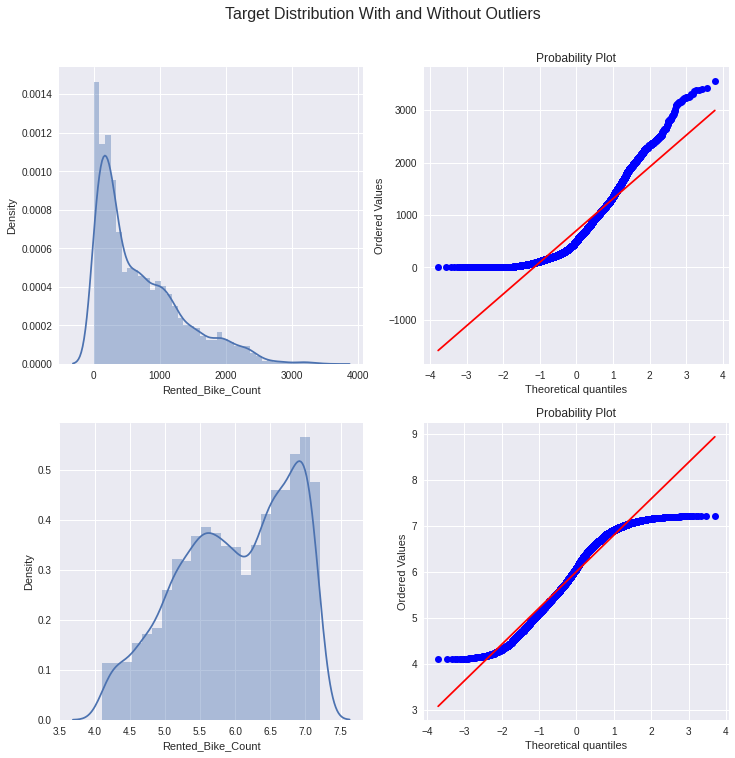

In [ ]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 12)
fig.suptitle('Target Distribution With and Without Outliers', fontsize=16, y=0.95)
sns.distplot(bike_df["Rented_Bike_Count"],ax=axes[0][0])
stats.probplot(bike_df["Rented_Bike_Count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log1p(bike_df_without_Outliers["Rented_Bike_Count"]),ax=axes[1][0])
stats.probplot(np.log1p(bike_df_without_Outliers["Rented_Bike_Count"]), dist='norm', fit=True, plot=axes[1][1])
plt.show()

**Target Mean Over Month, Hour By Seasons and Hour By WeekDay-**


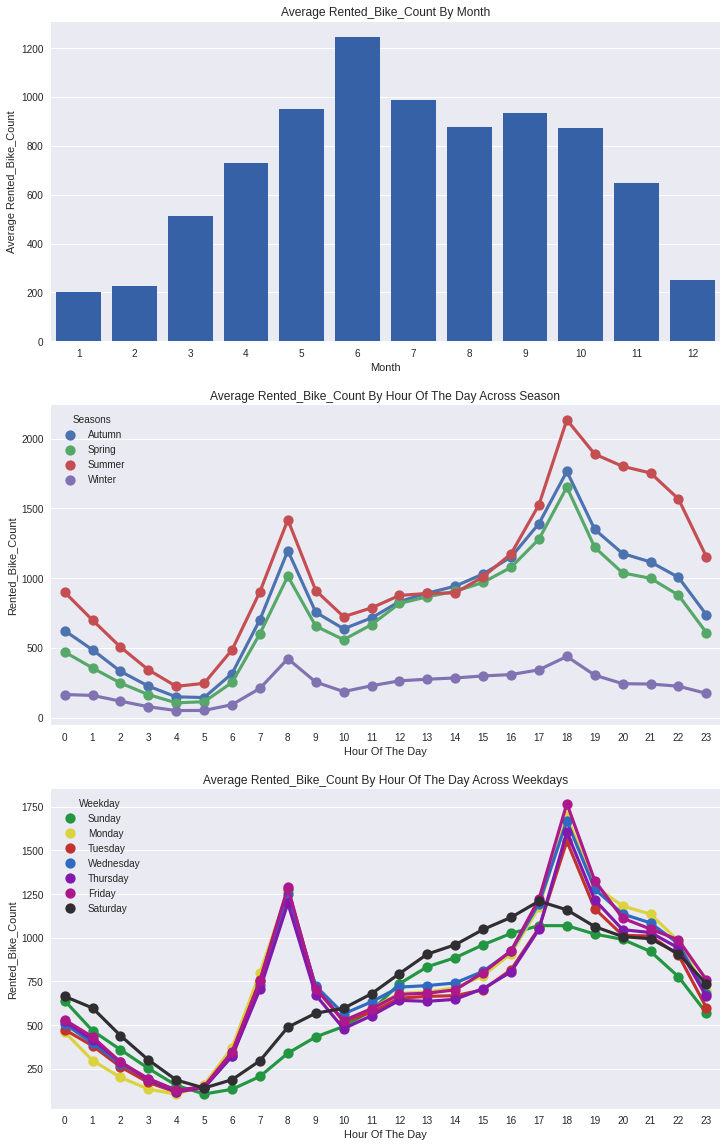

In [ ]:
# create subplot contain 3 cell in one column.
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)

# set figure size in inches
fig.set_size_inches(12,20)

# create list of month number.
sortOrder = [*range(1,13)]

# list of week days.
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

# group data py month get the mean of target every month. 
monthAggregated = pd.DataFrame(bike_df.groupby("Month")["Rented_Bike_Count"].mean()).reset_index()

# sort month based on mean of target Y.
monthSorted = monthAggregated.sort_values(by="Rented_Bike_Count",ascending=False)

# plot all month with mean of value Y as bars.
sns.barplot(data=monthSorted,x="Month",y="Rented_Bike_Count",ax=ax1,
            order=sortOrder,
            color="#255db8")

# set x label, y label and title
ax1.set(xlabel='Month', ylabel='Average Rented_Bike_Count',title="Average Rented_Bike_Count By Month")

# group data based on Hour and seasons get mean target Y for every Hour on every season.
hourAggregated = pd.DataFrame(bike_df.groupby(["Hour","Seasons"],sort=True)["Rented_Bike_Count"].mean()).reset_index()


# plot mean values for every hour for every season as poin plot.
sns.pointplot(x=hourAggregated["Hour"],
              y=hourAggregated["Rented_Bike_Count"],
              hue=hourAggregated["Seasons"],
              data=hourAggregated, 
              join=True,
              ax=ax2)

# set x label, y label , title and label
ax2.set(xlabel='Hour Of The Day', ylabel='Rented_Bike_Count',
        title="Average Rented_Bike_Count By Hour Of The Day Across Season",
        label='big')

# set a list of colors
cmap = ["#239641", "#dbd33d", "#c2332f", "#2f6ac2", "#8318ad", "#ad188a", "#302e30"]

# group data by Hour related with WeekDay by mean of Y target for every Hour for every WeekDay
hourAggregated = pd.DataFrame(bike_df.groupby(["Hour","Weekday"],sort=True)["Rented_Bike_Count"].mean()).reset_index()

sns.pointplot(x=hourAggregated["Hour"], 
              y=hourAggregated["Rented_Bike_Count"],
              hue=hourAggregated["Weekday"],
              hue_order=hueOrder, 
              data=hourAggregated,
              join=True,ax=ax3, 
              palette=cmap)


ax3.set(xlabel='Hour Of The Day', ylabel='Rented_Bike_Count',
        title="Average Rented_Bike_Count By Hour Of The Day Across Weekdays",
        label='big')
# Display plot
plt.show()

***Comment:- The average rented Bike Count is maximum in the month of June and minimum in January.We observe that,in Summer season the bike rental count is huge and low in Winter season as by hours of the day.Also,rented bike count is nearly same for all weekday except Saturday & Sunday.***

**Holiday and Functioning_Day analysis-**

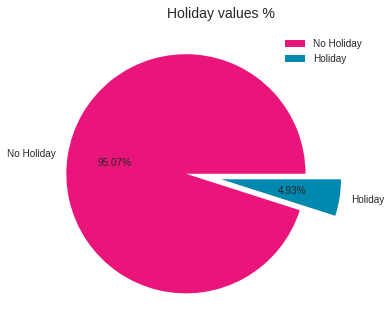

In [ ]:
plt.pie(bike_df.Holiday.value_counts(),
        labels=bike_df.Holiday.unique(),
        explode=[0.3,0],
        autopct='%1.2f%%',
        colors=["#ea157a","#0089af"])

plt.title("Holiday values %", y=1.02, fontsize=14)
plt.legend()
plt.show()

***Comment:- There is 95.07% for 'no holiday' whereas 'holiday' has 4.93% only.It means that, the rental bikes are choosen maximum on 'no holiday'.***

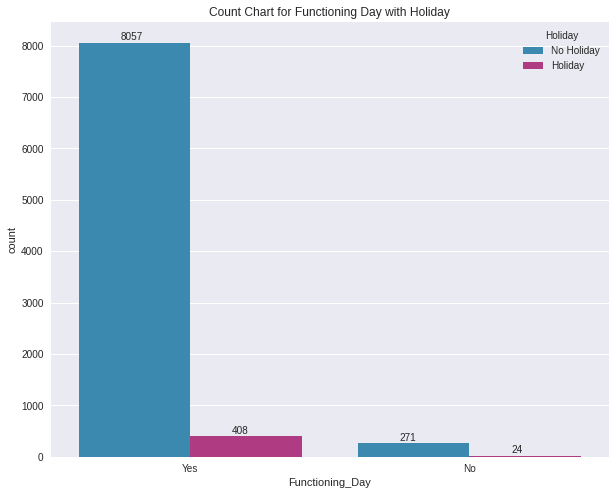

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Count Chart for Functioning Day with Holiday')
plt.xlabel('Functioning Day values')
plt.ylabel('count (Rented_Bike_Count)')

ax = sns.countplot(x= "Functioning_Day",
              data=bike_df,
              order=["Yes", "No"],
              hue="Holiday",
              palette=["#298fc2","#c22987"])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

plt.show()

***Comment:- On functional hours the rented bike count is maximum for 'no holiday' compare to non functional hours where 'no holiday' has minimum rented bike count.'Holiday' has the lowest bike rented count on functional hours and non-functional hours.***

### **Scatter plot with Season on x-axis and Count of Rented Bike on y-axis-**

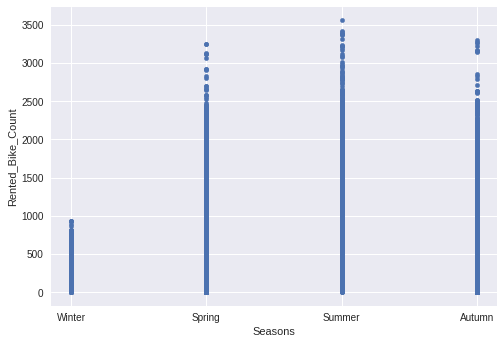

In [ ]:
bike_df.plot.scatter(x='Seasons', y='Rented_Bike_Count')

***Remark:From this plot we understand that for Summer season, the people used rental bike the most and in Winter the least.***

### **Scatter plot with holiday on x-axis and count of Rented bike on y-axis-**

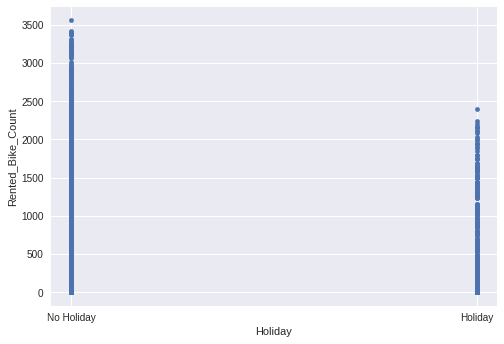

In [ ]:
bike_df.plot.scatter(x="Holiday", y="Rented_Bike_Count")

***Remark:-It is clear from this plot that on holiday, people use less renal bikes. The cause for this might be that a lot of them using bikes to go to office/work and on holiday they are not using it***

### **Scatter plot with workingday on x-axis and count of Rented Bike on y-axis-**

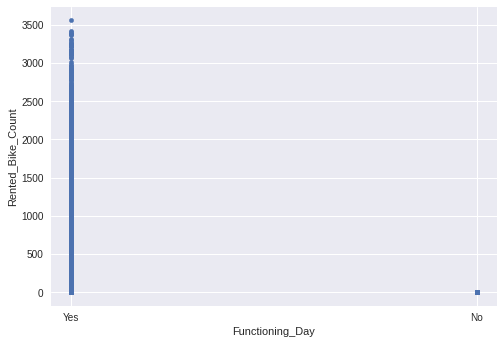

In [ ]:
bike_df.plot.scatter(x="Functioning_Day", y="Rented_Bike_Count")

***Remark:-What we suspected in last plot is confirmed in this one. on workingday people used more rental bikes.***

### **Scatter plot with temperature on x-axis and countof Rented Bike on y-axis-**

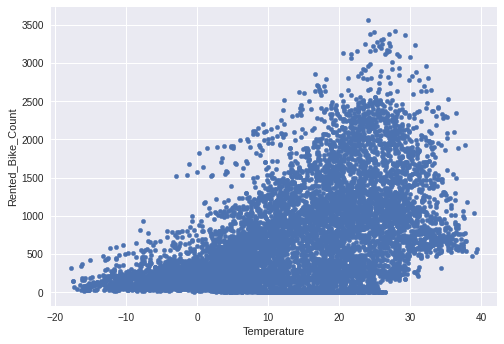

In [ ]:
bike_df.plot.scatter(x="Temperature", y="Rented_Bike_Count")

***Remark:-For extreme low temperature there are very few who used bikes and as temperature increases, the count also increases.***

### **Scatter plot with humidity on x-axis and count of Rented Bike on y-axis-**

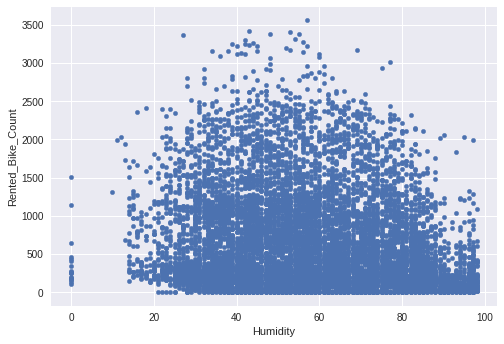

In [ ]:
bike_df.plot.scatter(x="Humidity", y="Rented_Bike_Count")

***Remark:-For extremely low and high humidity less bikes are in use which makes sense as they are corresponding to adverse weather conditions.***

### **Scatter plot with windspeed on x-axis and count of Rented Bike on y-axis-**

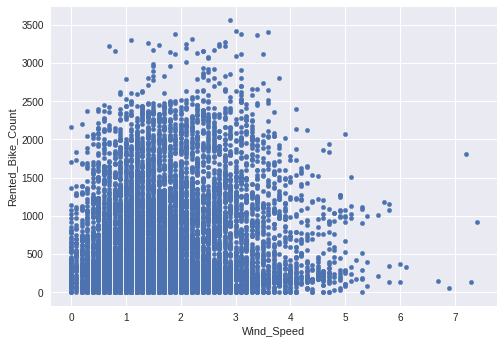

In [ ]:
bike_df.plot.scatter(x="Wind_Speed", y="Rented_Bike_Count")

***Remark:-As wind speed increased, the count decreases gradually which is anticipated as again with high wind speed associated with bad weather.***

## **Comment:-In conclusion till now, we understood two important points:**
1. Many people rent bike for traveling to office and home
2. Bad weather conditions have adverse effect on bike rentals

### **VISUALIZATION BY VALUE COUNTS-**

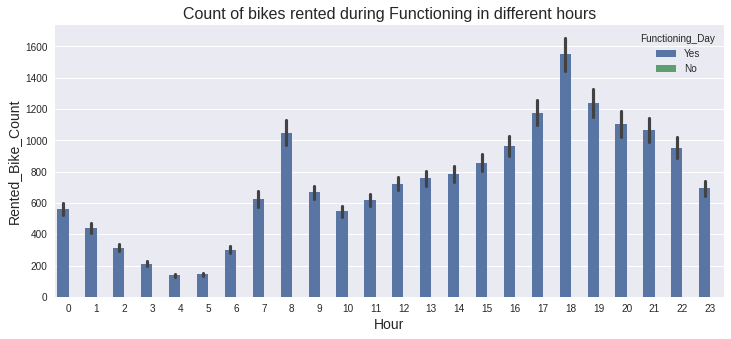

In [ ]:
#Functioning day value counts
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', hue='Functioning_Day', y='Rented_Bike_Count', data=bike_df)
plt.title("Count of bikes rented during Functioning in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented_Bike_Count", size=14)
plt.show()

***Comment:- For Functional hours , the rented bike count fluctuates in a wave pattern which depends on use of public need -office/home/outing.***

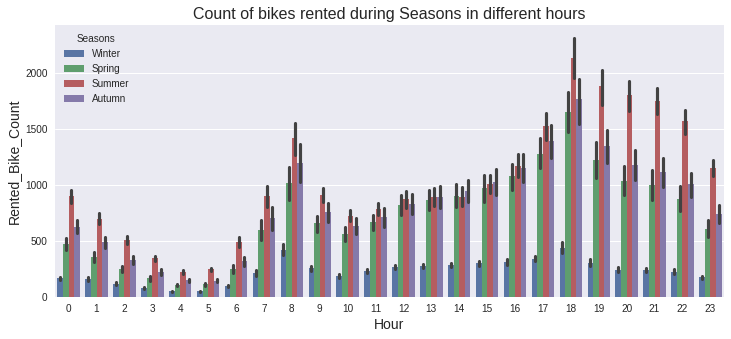

In [ ]:
#Seasons vs Rented Bike Count vs Hour
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented_Bike_Count', hue='Seasons', data=bike_df)
plt.title("Count of bikes rented during Seasons in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented_Bike_Count", size=14)
plt.show()

***Comment:- In Summer season, the count of bikes rented in different hours are huge compare to other seasons.In Autumn season, the count of bikes rented in different hours is opposite i.e low.***

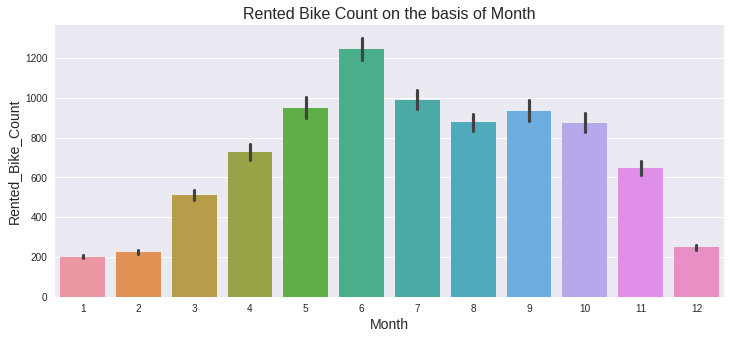

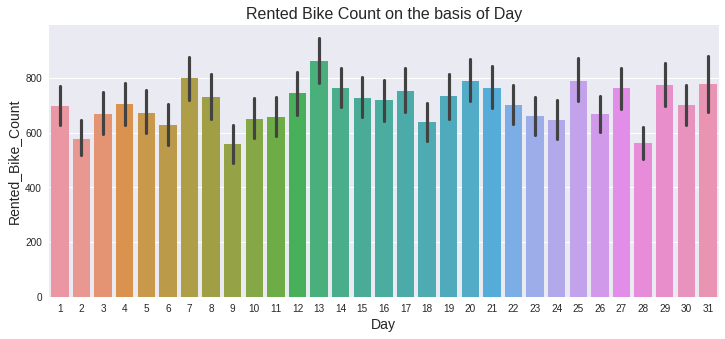

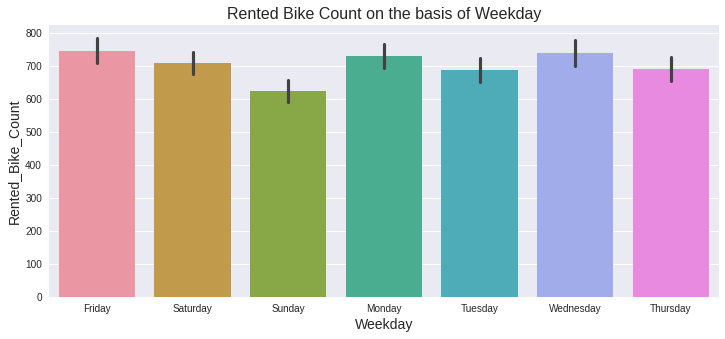

In [ ]:
#selecting some features for analysis-
parameters = ['Month', 'Day', 'Weekday']

#visualization of the value counts
for col in parameters:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    feature = 'Rented_Bike_Count'
    ch = sns.barplot(x=col, y=feature, data=bike_df, ax=ax)
    plt.xlabel(col, size=14)
    plt.ylabel(feature, size=14)
    plt.title(f"Rented Bike Count on the basis of {col}", size=16)
    plt.show()

***Comment:-In month, the count of rented bike is more in the middle i.e May, June & July whereas, low in December & January.And, Daywise the rented bike count depicts the similar behaviour everyday with slightly difference for weekoff(saturday/sunday).Also,Sunday has the lowest count of rented bike due to weekoff people avoid for rest.***

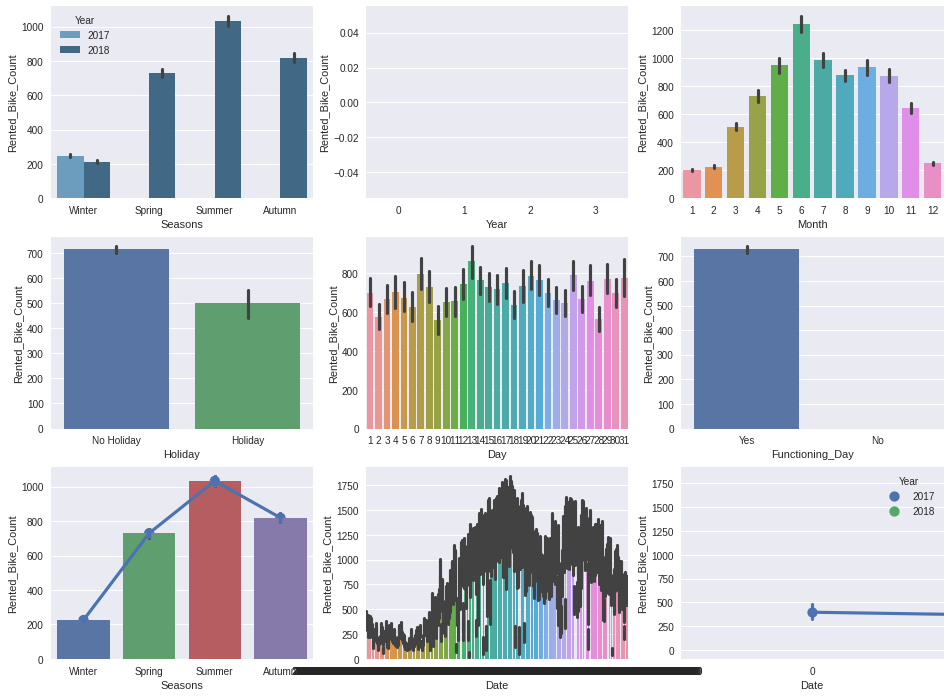

In [ ]:
#Graph of individual categorical features by count-
fig, saxis = plt.subplots(3, 3,figsize=(16,12))

sns.barplot(x = 'Seasons', y = 'Rented_Bike_Count',hue= 'Year', data=bike_df, ax = saxis[0,0], palette ="Blues_d")
sns.barplot(x = 'Year', y = 'Rented_Bike_Count', order=[0,1,2,3], data=bike_df, ax = saxis[0,1], palette ="Blues_d")
sns.barplot(x = 'Month', y = 'Rented_Bike_Count', data=bike_df, ax = saxis[0,2])
sns.barplot(x = 'Holiday', y = 'Rented_Bike_Count',  data=bike_df, ax = saxis[1,0])
sns.barplot(x = 'Day', y = 'Rented_Bike_Count',  data=bike_df, ax = saxis[1,1])
sns.barplot(x = 'Functioning_Day', y = 'Rented_Bike_Count', data=bike_df, ax = saxis[1,2])
sns.barplot(x = 'Seasons', y = 'Rented_Bike_Count', data=bike_df, ax = saxis[2,0])
sns.barplot(x = 'Date', y = 'Rented_Bike_Count' , data=bike_df, ax = saxis[2,1])
sns.pointplot(x = 'Seasons', y = 'Rented_Bike_Count', data=bike_df, ax = saxis[2,0])
sns.pointplot(x='Date', y='Rented_Bike_Count', hue='Year', data=bike_df, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[2,2])
sns.pointplot()

***Comment:-This categorical graphs represents all above conclsuions are correct.It shows,Summer season,Functioning hours,month of June and no holiday has the highest rented bike count.And,we observe the fluctuations for rental bikes in day & date variables.***

### **Outlier Analysis using Boxplot-**


**Univariate Boxplots: Boxplot for all Numerical Variables. Also for target variable-**

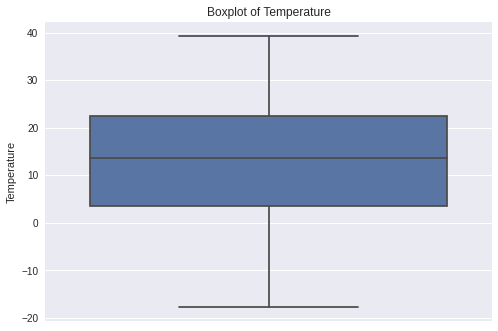

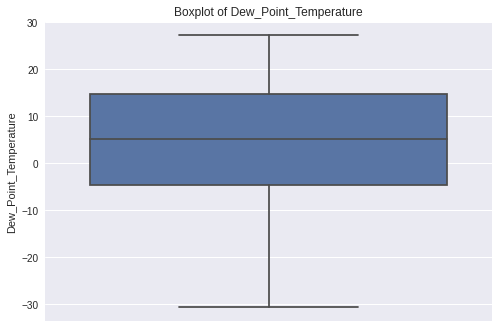

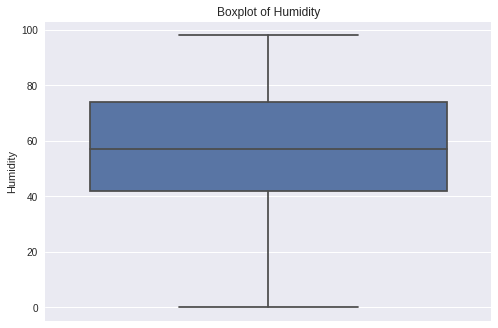

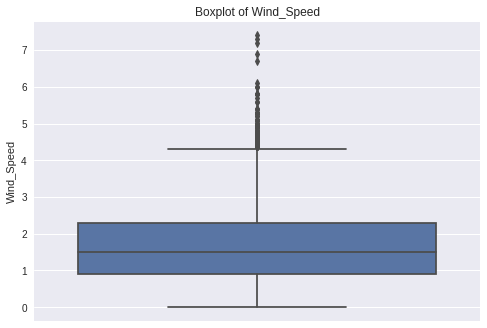

In [ ]:
cat_var=['Seasons','Holiday','Day','Functioning_Day','Year','Month']
bike_df[cat_var]=bike_df[cat_var].apply(lambda x: x.astype('category') )
num_var=['Temperature','Dew_Point_Temperature','Humidity','Wind_Speed']

for i in num_var:
    sns.boxplot(y=i,data=bike_df)
    plt.title('Boxplot of '+i)
#     plt.savefig('bp'+str(i)+'.png')
    plt.show()

### **Bivariate Boxplots: Boxplot for all Numerical Variables Vs all Categorical Variables-**

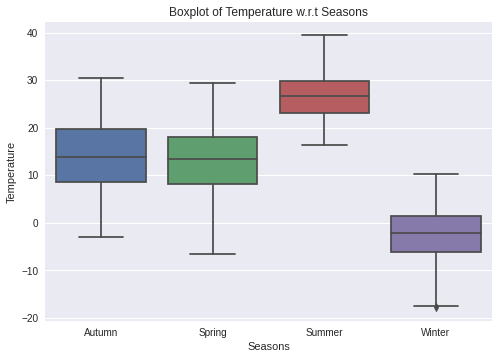

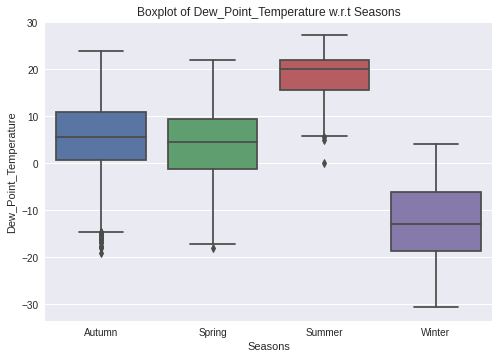

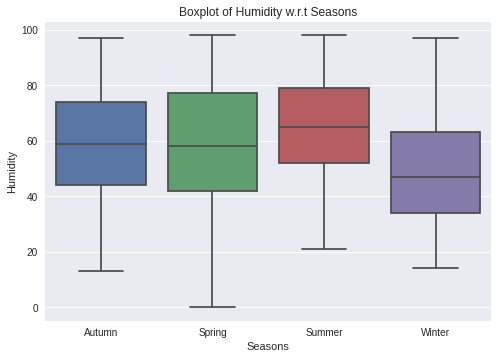

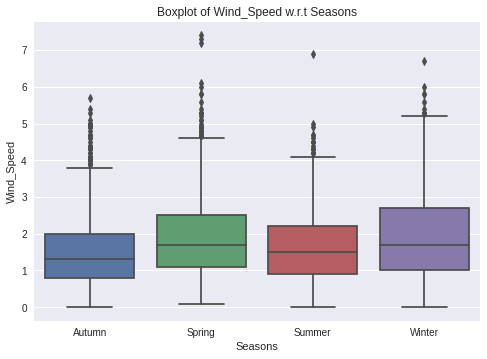

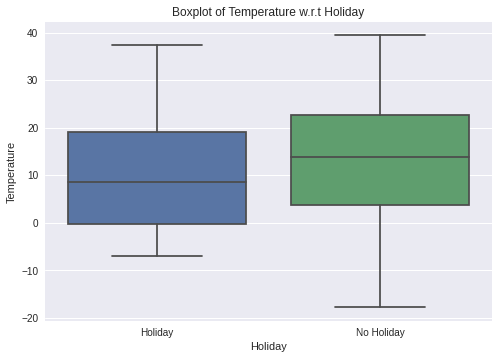

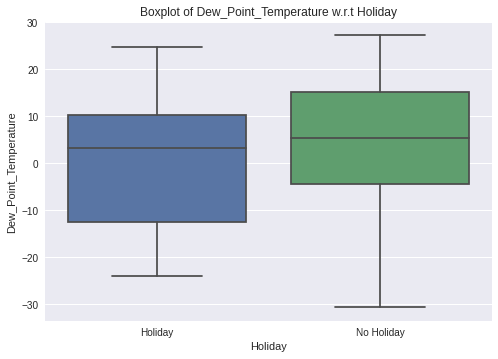

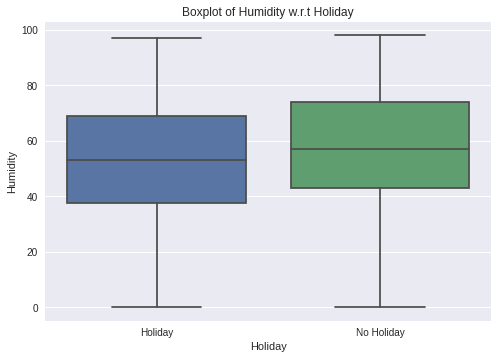

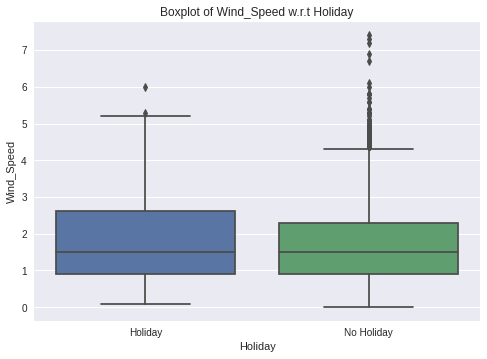

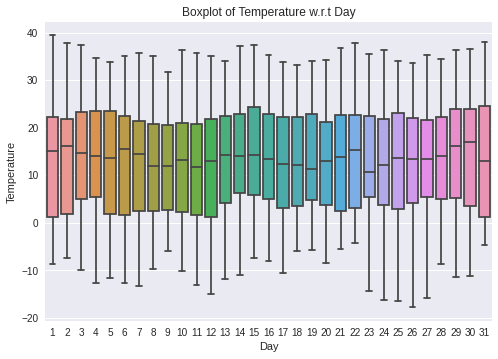

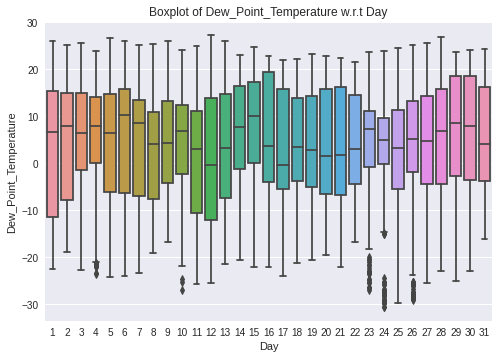

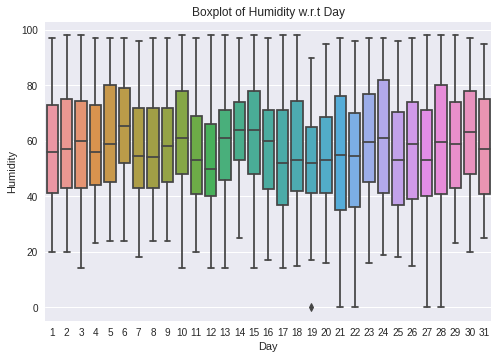

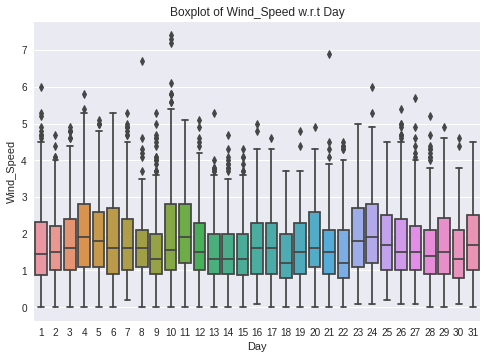

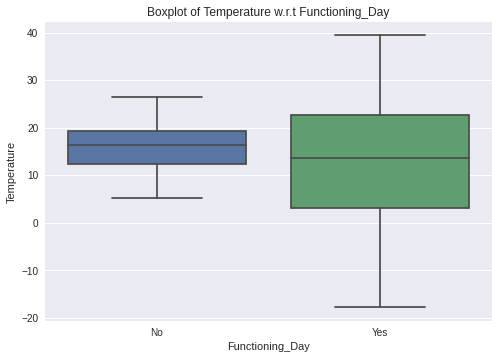

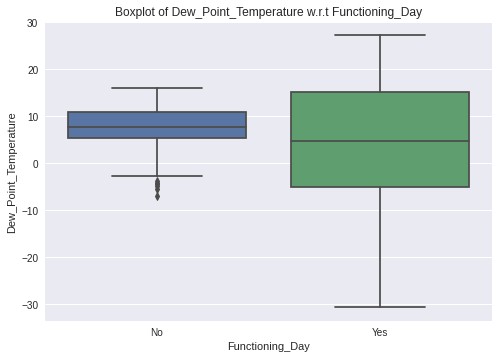

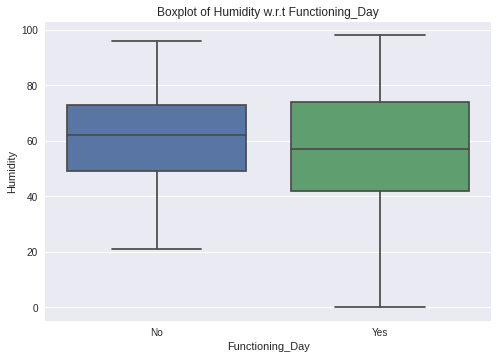

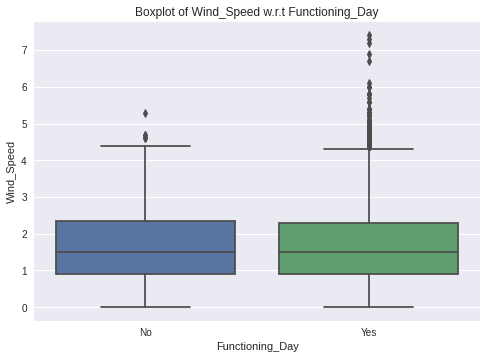

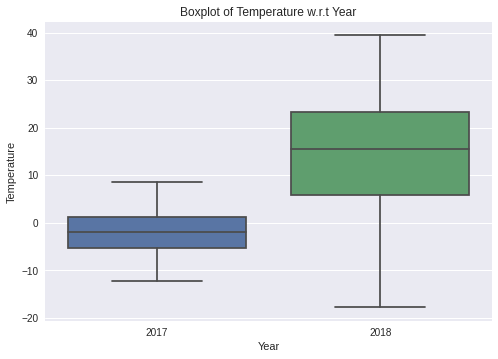

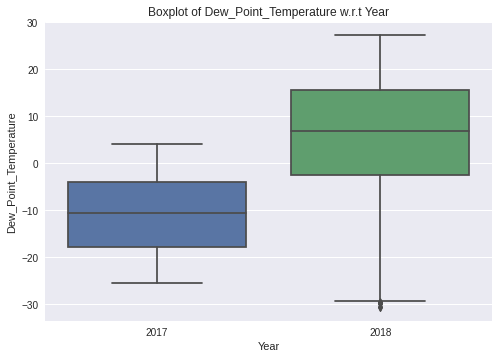

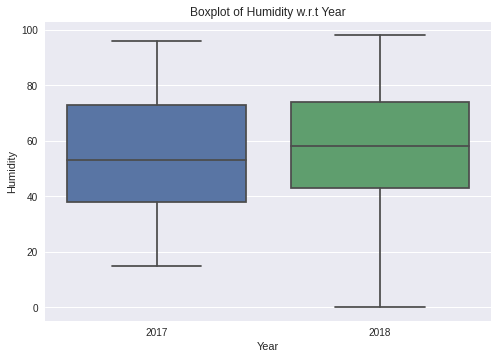

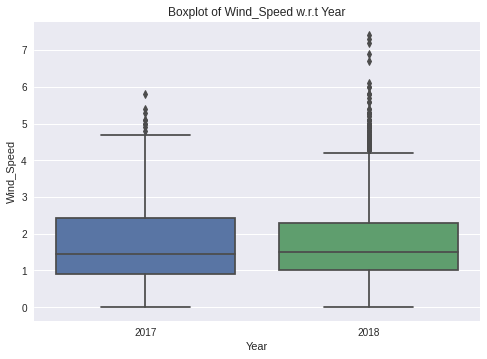

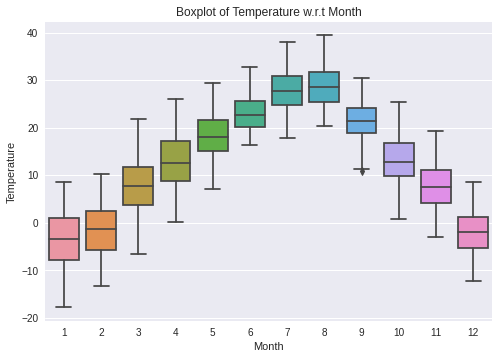

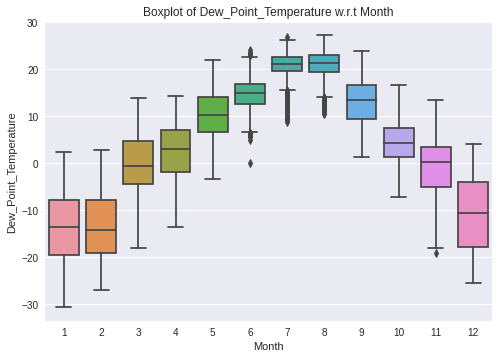

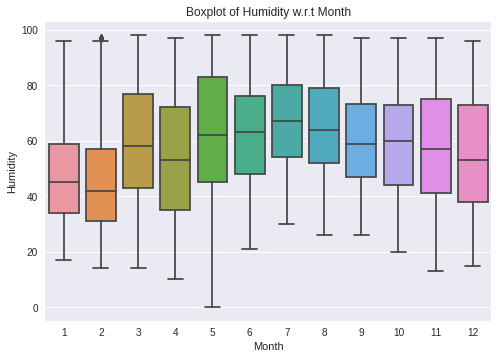

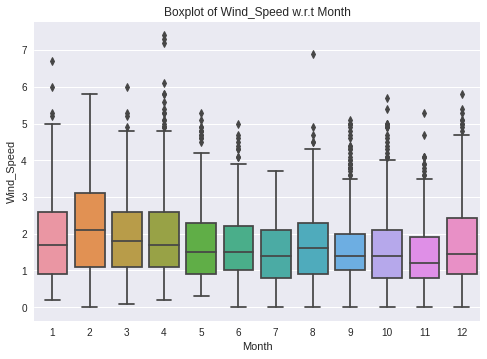

In [ ]:
for a in cat_var:
    for b in num_var:
        _ = sns.boxplot(x=a,y=b,data=bike_df)
        plt.title('Boxplot of '+b+' w.r.t '+a)
#         plt.savefig('Boxplot of '+str(b)+' w.r.t '+str(a)+'.png')
        plt.show()

***Comment:-As we can see from the above Boxplots-Univariate & Bivariate only 'Dew point temperature' and 'Windspeed' features in the dataset has the outliers.*** 

### **Outlier Treatment-**

In [ ]:
  # To evaluate Standard deviation for outlier treatment-
  bike_df.std()

Date                     105 days 08:55:44.535820018
Rented_Bike_Count                         644.997468
Hour                                        6.922582
Temperature                                11.944825
Humidity                                   20.362413
Wind_Speed                                    1.0363
Visibility                                608.298712
Dew_Point_Temperature                      13.060369
Solar_Radiation                             0.868746
Rainfall                                    1.128193
Snowfall                                    0.436746
dtype: object

**Remark:-Std Deviation before outlier treatment :**
standard deviation for 'dew point temperature'= 13.060369
standard deviation for 'windspeed'= 1.0363

In [ ]:
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(bike_df[col], [75 ,25])        # Divide data into 75%quantile and 25%quantile.
    #Calculate IQR
    iqr = q75 - q25                                          #Inter quantile range
    #Calculate inner and outer fence  
    minimum = q25 - (iqr*1.5)                                #inner fence
    maximum = q75 + (iqr*1.5)                                 #outer fence
    #Replace with NA
    bike_df.loc[bike_df[col] < minimum,col] = np.nan         #Replace with NA
    bike_df.loc[bike_df[col] > maximum,col] = np.nan           #Replace with NA

In [ ]:
outlier_treatment('Dew_Point_Temperature')

In [ ]:
bike_df['Dew_Point_Temperature'].isnull().sum()

0

In [ ]:
outlier_treatment('Wind_Speed')

In [ ]:
bike_df['Wind_Speed'].isnull().sum()

161

### We can check the standard deviation for imputation methods-Median/Mean and therefore,standard deviation remains nearly same with median imputation. so,median is selected for imputation method.


### **REMARK:-As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.**

In [ ]:
#Imputating the outliers by median Imputation-

bike_df['Wind speed'] = bike_df['Wind_Speed'].fillna(bike_df['Wind_Speed'].median())

In [ ]:
#Imputating the outliers by median Imputation-

bike_df['Dew point temp'] = bike_df['Dew_Point_Temperature'].fillna(bike_df['Dew_Point_Temperature'].median())

In [ ]:
bike_df.std()

Date                     105 days 08:55:44.535820018
Rented_Bike_Count                         644.997468
Hour                                        6.922582
Temperature                                11.944825
Humidity                                   20.362413
Wind_Speed                                  0.947656
Visibility                                608.298712
Dew_Point_Temperature                      13.060369
Solar_Radiation                             0.868746
Rainfall                                    1.128193
Snowfall                                    0.436746
Wind speed                                   0.93917
Dew point temp                             13.060369
dtype: object

**Remark:-Std Deviation after outlier treatment :**
standard deviation for 'Dew point temperature(°C)'= 13.060369
standard deviation for 'windspeed'= 0.93917

In [ ]:
#Replacing the imputated windspeed
bike_df['Wind_Speed']=bike_df['Wind_Speed'].replace(bike_df['Wind speed'])
#Replacing the imputated dew point temperature
bike_df['Dew_Point_Temperature']=bike_df['Dew_Point_Temperature'].replace(bike_df['Dew point temp'])


In [ ]:
bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Weekday,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Month,Day,Wind speed,Dew point temp
0,2017-12-01,254,0,-5.2,Friday,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,2.2,-17.6
1,2017-12-01,204,1,-5.5,Friday,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,0.8,-17.6
2,2017-12-01,173,2,-6.0,Friday,39,0.8,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,1.0,-17.7
3,2017-12-01,107,3,-6.2,Friday,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,0.9,-17.6
4,2017-12-01,78,4,-6.0,Friday,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,2.3,-18.6


# **Correlation matrix**

Correlation matrix tells about the linear relationship between attributes and help us to build better models.

In [ ]:
bike_df.corr()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Wind speed,Dew point temp
Rented_Bike_Count,1.000000,0.410257,0.538558,-0.199780,0.141682,0.199280,0.337336,0.261837,-0.123074,-0.141804,0.150898,0.379788
Hour,0.410257,1.000000,0.124114,-0.241644,0.264764,0.098753,0.006845,0.145131,0.008715,-0.021516,0.287054,0.003054
Temperature,0.538558,0.124114,1.000000,0.159371,-0.017444,0.034794,0.806896,0.353505,0.050282,-0.218405,-0.011857,0.912798
Humidity,-0.199780,-0.241644,0.159371,1.000000,-0.303118,-0.543090,0.476610,-0.461919,0.236397,0.108183,-0.322419,0.536894
Wind_Speed,0.141682,0.264764,-0.017444,-0.303118,1.000000,0.157652,-0.133460,0.300461,-0.021644,-0.010945,0.916216,-0.145757
Visibility,0.199280,0.098753,0.034794,-0.543090,0.157652,1.000000,-0.154169,0.149738,-0.167629,-0.121695,0.164652,-0.176630
Dew_Point_Temperature,0.337336,0.006845,0.806896,0.476610,-0.133460,-0.154169,1.000000,0.077780,0.105406,-0.134330,-0.134780,0.886475
Solar_Radiation,0.261837,0.145131,0.353505,-0.461919,0.300461,0.149738,0.077780,1.000000,-0.074290,-0.072301,0.319564,0.094381
Rainfall,-0.123074,0.008715,0.050282,0.236397,-0.021644,-0.167629,0.105406,-0.074290,1.000000,0.008500,-0.022380,0.125597
Snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.010945,-0.121695,-0.134330,-0.072301,0.008500,1.000000,-0.005090,-0.150887


### **Feature Selection-**
## Correlation Analysis for Numerical Variables/Features:
We will plot a Heatmap of correlation whereas, correlation measures how strongly 2 quantities are related to each other.
We go for correlation to avoid redundant information in our model development.

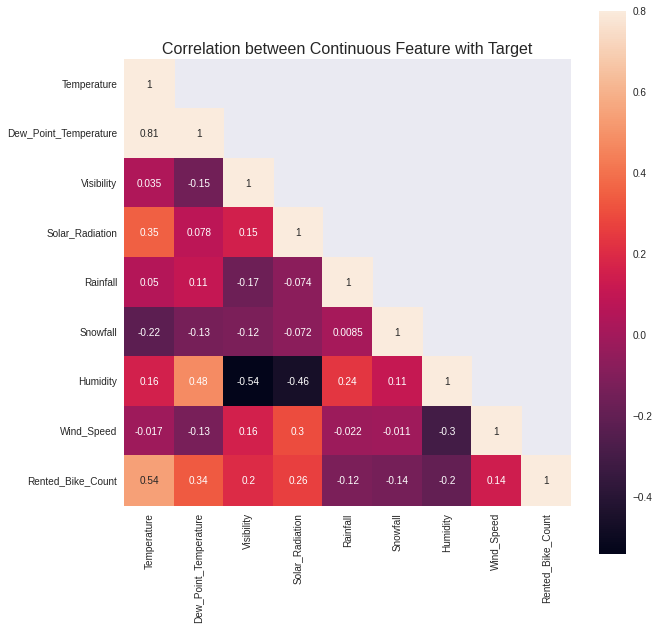

In [ ]:
# heatmap using correlation matrix
# list of continuous feature
columns = ["Temperature","Dew_Point_Temperature","Visibility","Solar_Radiation",
           "Rainfall","Snowfall","Humidity","Wind_Speed","Rented_Bike_Count"]
# calculate correlation matrix.
corrMatt = bike_df[columns].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
g = sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, )
g.set_title("Correlation between Continuous Feature with Target", fontsize=16, y=1.05)
plt.show()

### ***Comment:- 'Temperature' and 'Dew point temperature' are very highly correlated with each other.***




### **From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp. and dew point temp. are highly positively correlated to each other, it means that both are carrying same information. So, we are going to ignore temp & dew pointfor further analysis.**

## **Normal Probability Plot-**


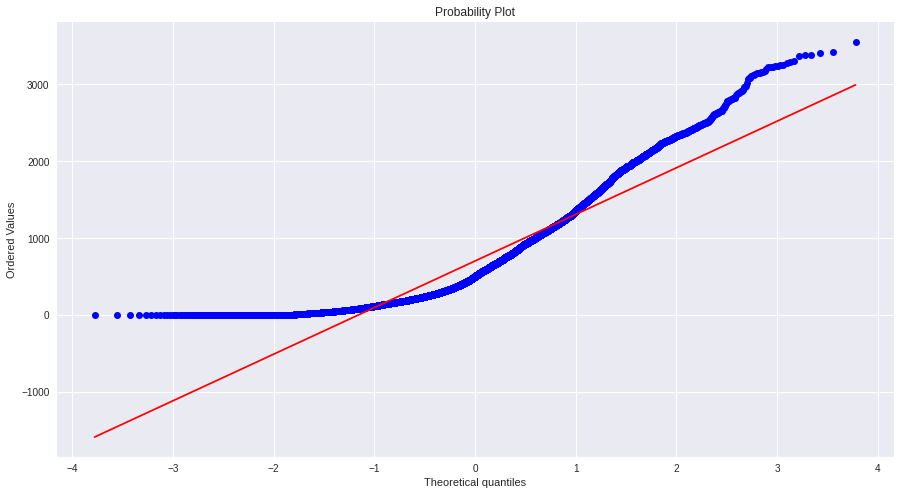

In [ ]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(bike_df["Rented_Bike_Count"],dist='norm',plot=plt)
plt.show()

***Comment:-The above probability plot, the some target variable data points are deviates from normality.***

## **Feature Scaling-**


Let us check variance for each column in dataset before Normalisation because
High variance will affect the accuracy of the model. so we want to normalise that variance.

In [ ]:
bike_df[num_var].var()

Temperature              142.678850
Dew_Point_Temperature    182.396711
Humidity                 414.627875
Wind_Speed                 0.854110
dtype: float64

### **Normality Check by Plotting distribution plot and probability plot-**

Distribution before Normaliation-

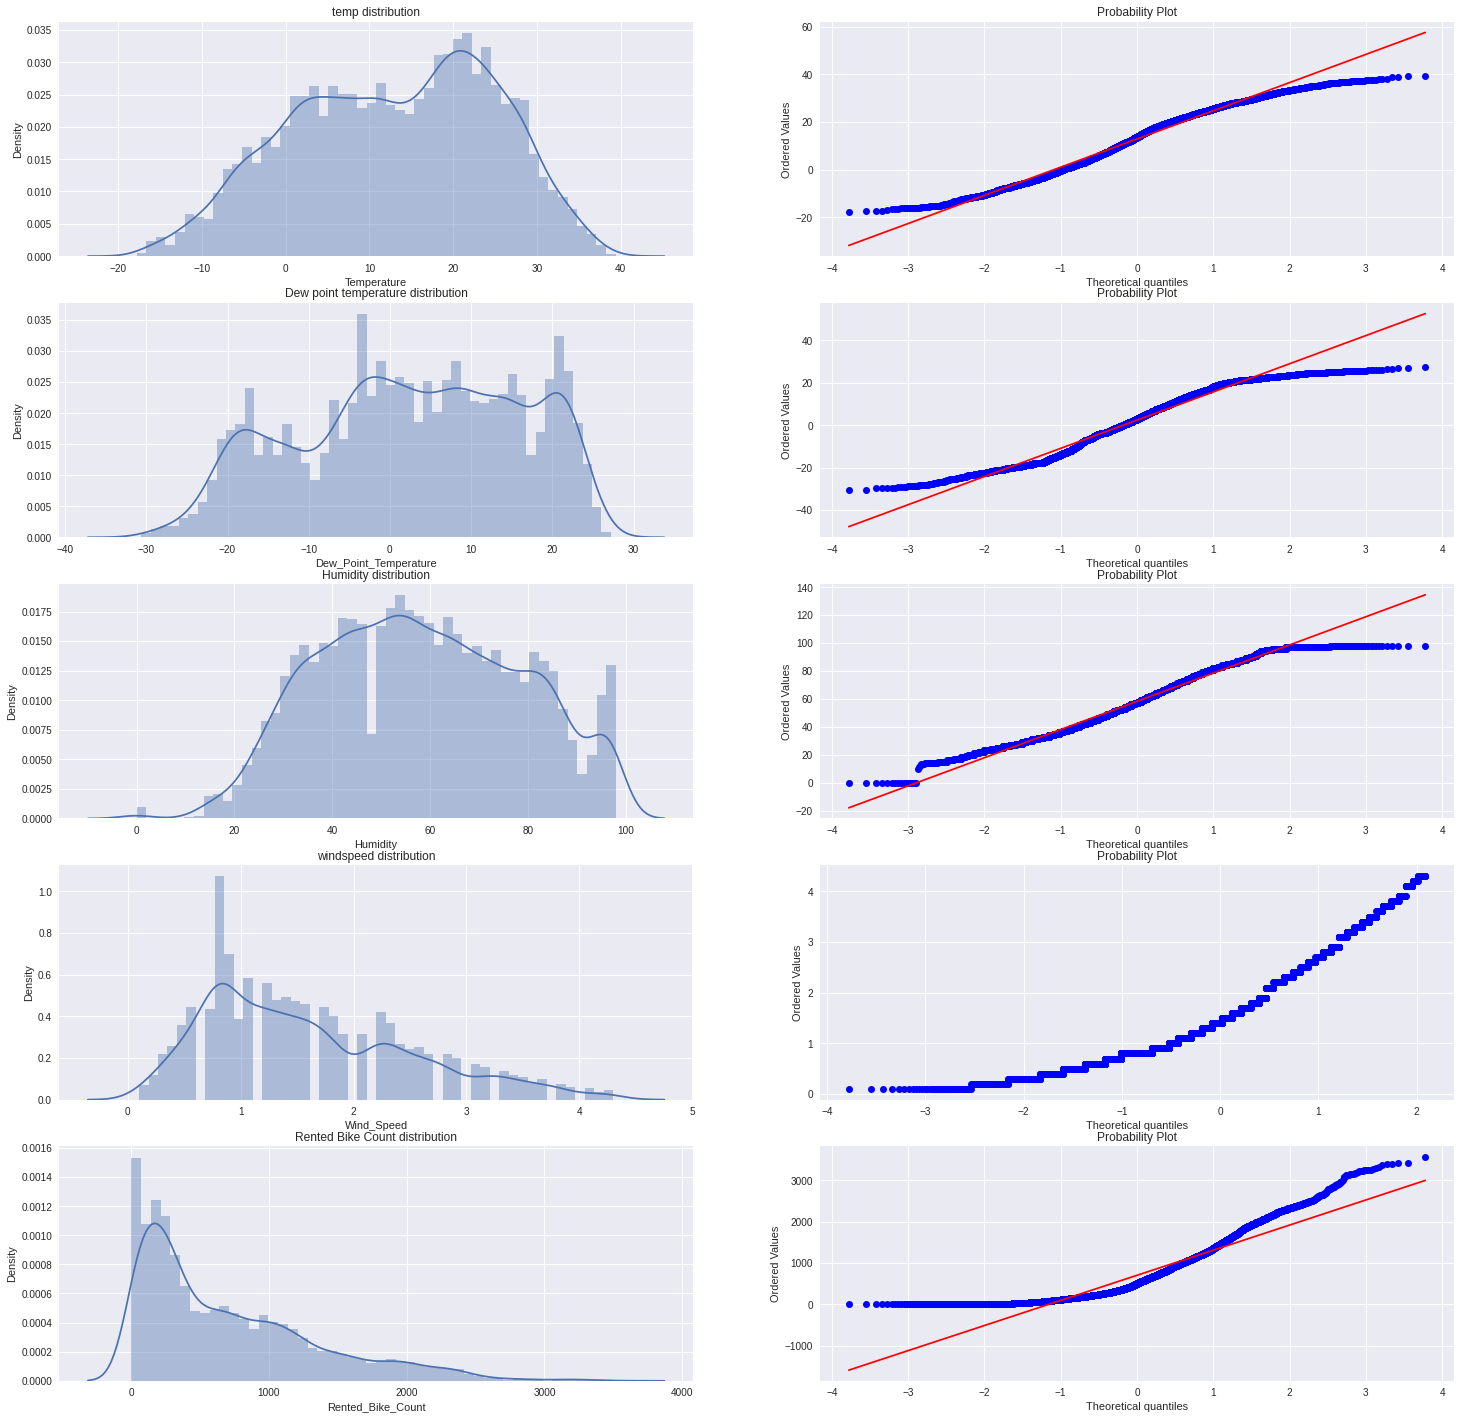

In [ ]:
fig,ax = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(25, 25)
sns.distplot(bike_df['Temperature'],bins =50,ax = ax[0][0])
ax[0][0].set(title="temp distribution")
_ = stats.probplot(bike_df['Temperature'], dist='norm', fit=True,plot=ax[0][1])
ax[0][1].set(title="Probability Plot")
sns.distplot(bike_df['Dew_Point_Temperature'],bins =50,ax = ax[1][0])
ax[1][0].set(title="Dew point temperature distribution")
_ = stats.probplot(bike_df['Dew_Point_Temperature'], dist='norm', fit=True,plot=ax[1][1])
ax[1][1].set(title="Probability Plot")
sns.distplot(bike_df['Humidity'],bins =50,ax = ax[2][0])
ax[2][0].set(title="Humidity distribution")
_ = stats.probplot(bike_df['Humidity'], dist='norm', fit=True,plot=ax[2][1])
ax[2][1].set(title="Probability Plot")
sns.distplot(bike_df['Wind_Speed'],bins =50,ax = ax[3][0])
ax[3][0].set(title="windspeed distribution")
_ = stats.probplot(bike_df['Wind_Speed'], dist='norm', fit=True,plot=ax[3][1])
ax[3][1].set(title="Probability Plot")
sns.distplot(bike_df['Rented_Bike_Count'],bins =50,ax = ax[4][0])
ax[4][0].set(title="Rented Bike Count distribution")
_ = stats.probplot(bike_df['Rented_Bike_Count'], dist='norm', fit=True,plot=ax[4][1])
ax[4][1].set(title="Probability Plot")
# plt.savefig('Distribution before Normaliation.png')
plt.show()

In [ ]:
#Normalisation-
for i in num_var:
    print(i)
    bike_df[i] = (bike_df[i] - min(bike_df[i]))/(max(bike_df[i]) - min(bike_df[i]))

Temperature
Dew_Point_Temperature
Humidity
Wind_Speed


**Distribution** **after** **Normalisation-**

Let us check variance for each column in dataset after Normalisation

In [ ]:
bike_df[num_var].var()

Temperature              0.043608
Dew_Point_Temperature    0.054596
Humidity                 0.043172
Wind_Speed               0.048419
dtype: float64

***Comment:- After Noramalization, the variance of numerical features are seen low which will help to observe the accuaracy of the model.***

## **Multicollinearity Test-**

Preparing the new data frame with selected columns-


In [ ]:
bike_df =bike_df[['Year', 'Month', 'Day', 'Rented_Bike_Count', 'Hour',  'Holiday',  'Visibility','Temperature', 
                'Humidity', 'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Wind_Speed']]

In [ ]:
bike_df.dtypes

Year                     category
Month                    category
Day                      category
Rented_Bike_Count           int64
Hour                        int64
Holiday                  category
Visibility                  int64
Temperature               float64
Humidity                  float64
Dew_Point_Temperature     float64
Solar_Radiation           float64
Rainfall                  float64
Snowfall                  float64
Seasons                  category
Wind_Speed                float64
dtype: object

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Year                   8760 non-null   category
 1   Month                  8760 non-null   category
 2   Day                    8760 non-null   category
 3   Rented_Bike_Count      8760 non-null   int64   
 4   Hour                   8760 non-null   int64   
 5   Holiday                8760 non-null   category
 6   Visibility             8760 non-null   int64   
 7   Temperature            8760 non-null   float64 
 8   Humidity               8760 non-null   float64 
 9   Dew_Point_Temperature  8760 non-null   float64 
 10  Solar_Radiation        8760 non-null   float64 
 11  Rainfall               8760 non-null   float64 
 12  Snowfall               8760 non-null   float64 
 13  Seasons                8760 non-null   category
 14  Wind_Speed             8599 non-null   f

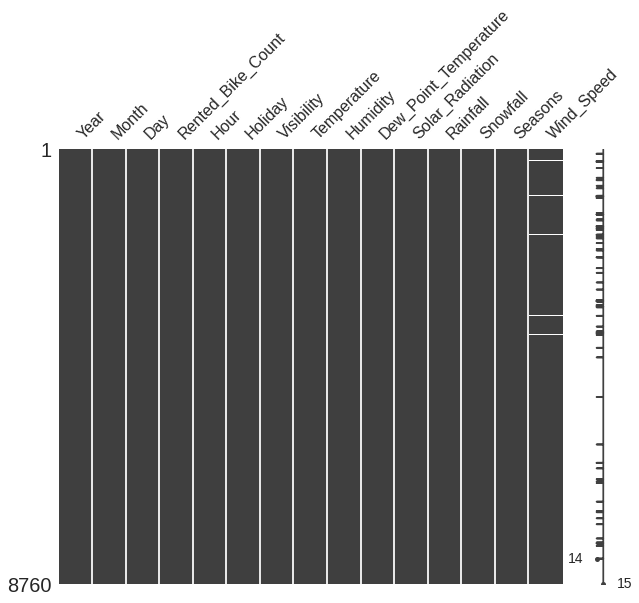

In [ ]:
# checking missing values in new dataframe-
mno.matrix(bike_df,figsize=(10,8))

In [ ]:
# Replacing missing values by NAN -
bike_df['Wind_Speed'].fillna('unknown',inplace=True)

In [ ]:
# Importing libraries for multicollinearity-
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def cal_vif(X):
  vif = pd.DataFrame()
  vif['Variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

In [ ]:
# VIF -
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in['Day', 'Year', 'Temperature']]])

,Variables,VIF
0,Rented_Bike_Count,3.590435
1,Hour,4.161441
2,Visibility,4.361638
3,Humidity,11.548679
4,Dew_Point_Temperature,14.164964
5,Solar_Radiation,1.810299
6,Rainfall,1.094684
7,Snowfall,1.100190


**Comment:- From above Dataframe, we see that there is Multicollinearity in our Data for-**
**Dew point temperature(°C) and Humidity(%) has highest VIF value**



### Now we will drop the highest mulicolinearity column-


## **Feature Engineering-**


Feature Engineering on numerical Features-
we know that dew point temp and humidity are both temperature values and are very highly correlated with each other.
## **we will aggregate those 2 columns and derive a new feature.**

In [ ]:
columns = ['Humidity','Dew_Point_Temperature']
bike_df['mean_Humidity'] = bike_df.apply(lambda row: row[columns].mean(), axis=1)
bike_df.head()


,Year,Month,Day,Rented_Bike_Count,Hour,Holiday,Visibility,Temperature,Humidity,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Wind_Speed,mean_Humidity
0,2017,12,1,254,0,No Holiday,2000,0.220280,0.377551,0.224913,0.0,0.0,0.0,Winter,0.5,0.301232
1,2017,12,1,204,1,No Holiday,2000,0.215035,0.387755,0.224913,0.0,0.0,0.0,Winter,0.166667,0.306334
2,2017,12,1,173,2,No Holiday,2000,0.206294,0.397959,0.223183,0.0,0.0,0.0,Winter,0.166667,0.310571
3,2017,12,1,107,3,No Holiday,2000,0.202797,0.408163,0.224913,0.0,0.0,0.0,Winter,0.190476,0.316538
4,2017,12,1,78,4,No Holiday,2000,0.206294,0.367347,0.207612,0.0,0.0,0.0,Winter,0.52381,0.287480


Now that we have derived a new Column 'mean_temp' we can drop 'humidity' and 'dew pt.temp'


In [ ]:
#To drop columns-
bike_df = bike_df.drop(['Humidity','Dew_Point_Temperature'],axis = 1)

In [ ]:
# To view the dataset after dropping columns-
bike_df.head()

,Year,Month,Day,Rented_Bike_Count,Hour,Holiday,Visibility,Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Wind_Speed,mean_Humidity
0,2017,12,1,254,0,No Holiday,2000,0.220280,0.0,0.0,0.0,Winter,0.5,0.301232
1,2017,12,1,204,1,No Holiday,2000,0.215035,0.0,0.0,0.0,Winter,0.166667,0.306334
2,2017,12,1,173,2,No Holiday,2000,0.206294,0.0,0.0,0.0,Winter,0.166667,0.310571
3,2017,12,1,107,3,No Holiday,2000,0.202797,0.0,0.0,0.0,Winter,0.190476,0.316538
4,2017,12,1,78,4,No Holiday,2000,0.206294,0.0,0.0,0.0,Winter,0.52381,0.287480


# **One-Hot Encoding-**

we will use one-hot encoding techniques on categorical variables - Season,Holiday,Year

In [ ]:
bike_df.nunique()

Year                    2
Month                  12
Day                    31
Rented_Bike_Count    2166
Hour                   24
Holiday                 2
Visibility           1789
Temperature           546
Solar_Radiation       345
Rainfall               61
Snowfall               51
Seasons                 4
Wind_Speed             41
mean_Humidity        7190
dtype: int64

In [ ]:
one_hot_var = ['Seasons','Holiday','Year']

In [ ]:
#Creating dummies for categorical variables-
for i in one_hot_var:
    ''' Creating dummies for each variable in one_hot_var and merging dummies dataframe to our original dataframe '''
    temp= pd.get_dummies(bike_df[i], prefix = i)
    bike_df = bike_df.join(temp)

In [ ]:
bike_df.columns

Index(['Year', 'Month', 'Day', 'Rented_Bike_Count', 'Hour', 'Holiday',
       'Visibility', 'Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Wind_Speed', 'mean_Humidity', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Year_2017', 'Year_2018'],
      dtype='object')

We will remove the variables which were used to generate one hot encoding variables-

In [ ]:
bike_df = bike_df.drop(['Seasons','Holiday','Year'],axis = 1)


**Let's check the new data frame**-

In [ ]:
new_df=bike_df.columns
new_df

Index(['Month', 'Day', 'Rented_Bike_Count', 'Hour', 'Visibility',
       'Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Wind_Speed',
       'mean_Humidity', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday', 'Year_2017',
       'Year_2018'],
      dtype='object')

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Month               8760 non-null   category
 1   Day                 8760 non-null   category
 2   Rented_Bike_Count   8760 non-null   int64   
 3   Hour                8760 non-null   int64   
 4   Visibility          8760 non-null   int64   
 5   Temperature         8760 non-null   float64 
 6   Solar_Radiation     8760 non-null   float64 
 7   Rainfall            8760 non-null   float64 
 8   Snowfall            8760 non-null   float64 
 9   Wind_Speed          8760 non-null   object  
 10  mean_Humidity       8760 non-null   float64 
 11  Seasons_Autumn      8760 non-null   uint8   
 12  Seasons_Spring      8760 non-null   uint8   
 13  Seasons_Summer      8760 non-null   uint8   
 14  Seasons_Winter      8760 non-null   uint8   
 15  Holiday_Holiday     8760 non-null   ui

In [ ]:
# convert the type of all columns of DataFrame-
df = bike_df.apply(pd.to_numeric,errors='coerce') # convert all columns of DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               8760 non-null   int64  
 1   Day                 8760 non-null   int64  
 2   Rented_Bike_Count   8760 non-null   int64  
 3   Hour                8760 non-null   int64  
 4   Visibility          8760 non-null   int64  
 5   Temperature         8760 non-null   float64
 6   Solar_Radiation     8760 non-null   float64
 7   Rainfall            8760 non-null   float64
 8   Snowfall            8760 non-null   float64
 9   Wind_Speed          8599 non-null   float64
 10  mean_Humidity       8760 non-null   float64
 11  Seasons_Autumn      8760 non-null   uint8  
 12  Seasons_Spring      8760 non-null   uint8  
 13  Seasons_Summer      8760 non-null   uint8  
 14  Seasons_Winter      8760 non-null   uint8  
 15  Holiday_Holiday     8760 non-null   uint8  
 16  Holida

In [ ]:
# To replace the values of infinity -
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [ ]:
df.head()

,Month,Day,Rented_Bike_Count,Hour,Visibility,Temperature,Solar_Radiation,Rainfall,Snowfall,Wind_Speed,mean_Humidity,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Year_2017,Year_2018
0,12,1,254,0,2000,0.220280,0.0,0.0,0.0,0.500000,0.301232,0,0,0,1,0,1,1,0
1,12,1,204,1,2000,0.215035,0.0,0.0,0.0,0.166667,0.306334,0,0,0,1,0,1,1,0
2,12,1,173,2,2000,0.206294,0.0,0.0,0.0,0.166667,0.310571,0,0,0,1,0,1,1,0
3,12,1,107,3,2000,0.202797,0.0,0.0,0.0,0.190476,0.316538,0,0,0,1,0,1,1,0
4,12,1,78,4,2000,0.206294,0.0,0.0,0.0,0.523810,0.287480,0,0,0,1,0,1,1,0


In [ ]:
df.shape

(8760, 19)

**Data Preprocessing**

In [ ]:
#defining dependent and independent variables 
dependent_variable = 'Rented_Bike_Count'
independent_variable = ['Month', 'Day', 'Hour', 'Visibility', 'Temperature', 'Solar_Radiation','Rainfall',
       'Snowfall', 'Wind_Speed', 'mean_Humidity', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer' , 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Year_2017', 'Year_2018']
     
       

In [ ]:
#defining X and y varaibles 
y = df[dependent_variable]
X = df[independent_variable]

# **MODEL FITTING-**

***MODEL FITTING FOR TRAIN AND TEST DATA:***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

**Splitting the dataset into train and test in the ratio of 70:30**

In [ ]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (6132, 18)
Size of X_test is: (2628, 18)
Size of y_train is: (6132,)
Size of y_test is: (2628,)


In [ ]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Development


In [ ]:
#load the required libraries
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

### LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression

# Fit the linear regression on the training set
model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [ ]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True) # suppress = True, suppresses the use of scientific notation for small numbers

print(f'Predicted labels: {np.round(predictions)[:10]}')
print(f'Actaul labels: {y_test[:10]}')

Predicted labels: [1068. 1110. 1249. 1179.  489.  754. 1362.  944. 1034.  723.]
Actaul labels: 6056    1728
5556     822
5990     658
7674    2716
3319    1083
5761     636
5972    1537
8758     712
6079     425
7177     594
Name: Rented_Bike_Count, dtype: int64


Polynomial function:  
0.4915 x + 349.3


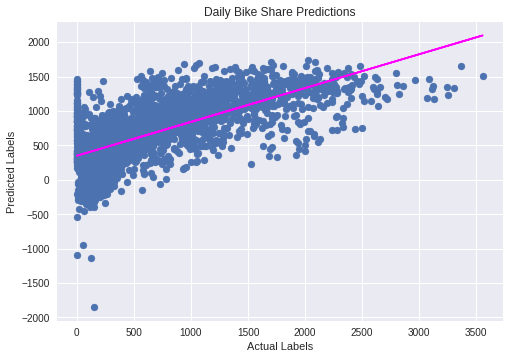

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

***Comment:-There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. This variance represents the residuals of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. These residuals when evaluated from the validation data indicate the expected level of error when the model is used with new data for which the label is unknown.***



### **Let's use Scikit-Learn to calculate these metrics for our model, based on the predictions it generated for the validation data.**

In [ ]:
#accuracy of the model
rf_score =model.score(X_test,y_test)
print('Accuracy of the model for test data set :',rf_score)
from sklearn.metrics import mean_squared_error, r2_score
print('Metrics for test data set :',)
# Evaluate the model using test data
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

Accuracy of the model for test data set : 0.47392238894750793
Metrics for test data set :
MSE: 215581.40015246143
RMSE: 464.30744141404995
R2: 0.47392238894750793


In [ ]:
#accuracy of the model
rf_score =model.score(X_train,y_train)
print('Accuracy of the model for train data set :',rf_score)
from sklearn.metrics import mean_squared_error, r2_score
print('Metrics for train data set :',)
# Evaluate the model using train data
predict_train=model.predict(X_train)
mse = mean_squared_error(y_train,predict_train)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

r2 = r2_score(y_train, predict_train)
print(f'R2: {r2}')

Accuracy of the model for train data set : 0.4877287578721502
Metrics for train data set :
MSE: 214442.27946279573
RMSE: 463.0791287272573
R2: 0.4877287578721502


***Comment:- In regression model, accuracy of the training data set is 49% and accuracy of testing data set is 47% which implies the accuracy rate of linear regression model is low.Also, RMSE for both train and test data set is not good to consider this model as best fit.***

## **LASSO REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import Lasso

# Fit Lasso model on training set
model = Lasso().fit(X_train, y_train)
print(model)

print('Metrics for test data set :',)
#accuracy of the model
rf_score =model.score(X_test,y_test)
print('Accuracy of the model of the test data set:',rf_score)


# Evaluate the model using test data
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')



Lasso()
Metrics for test data set :
Accuracy of the model of the test data set: 0.47553928115043753
MSE: 214918.81372475583
RMSE: 463.59337109664955
R2: 0.47553928115043753


In [ ]:
print('Metrics for train data set :',)
#accuracy of the model
rf_score =model.score(X_train,y_train)
print('Accuracy of the model of the train data set:',rf_score)
# Evaluate the model using train data

mse = mean_squared_error(y_train,predict_train)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

r2 = r2_score(y_train,predict_train)
print(f'R2: {r2}')

Metrics for train data set :
Accuracy of the model of the train data set: 0.487086905830742
MSE: 214442.27946279573
RMSE: 463.0791287272573
R2: 0.4877287578721502


In [ ]:
#Cross validation prediction
predict=cross_val_predict(model,X_train,y_train,cv=3)
predict

array([-154.9107967 ,  466.95127219,  473.91253121, ..., 1181.91566921,
        435.04759964, 1560.04359631])

Polynomial function:  
0.4882 x + 351.2


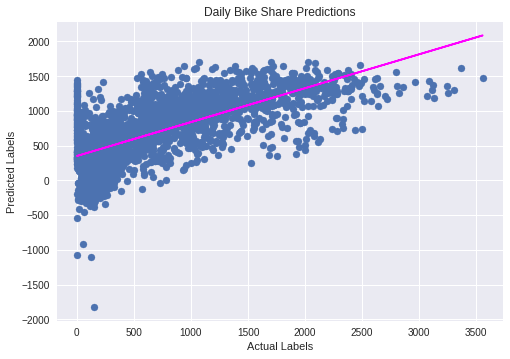

In [ ]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test 
plt.show()

***Comment:- Lasso regression model gives us the similar output as linear regression model.The accuracy rate of the lasso model is lower.Hence,we cannot consider this model as best fit.***

## DECISION TREE REGRESSOR

In [ ]:
#training the model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [ ]:
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [ ]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.6163737096682349


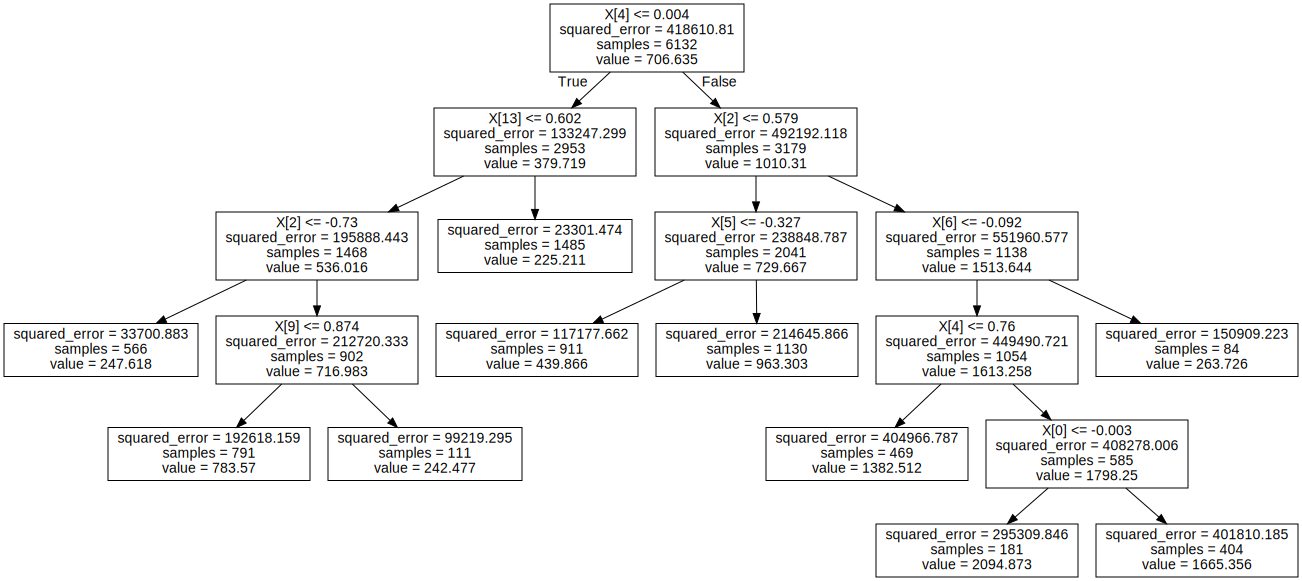

In [ ]:
#Plot the learned model
from sklearn import tree
import pydot
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

Cross validation prediction-

In [ ]:
predict=cross_val_predict(dtr,X_train,y_train,cv=5)
predict

array([ 226.35514019,  226.35514019,  809.19202899, ...,  969.80600214,
        285.73497424, 1899.68950749])

Cross validation prediction plot-

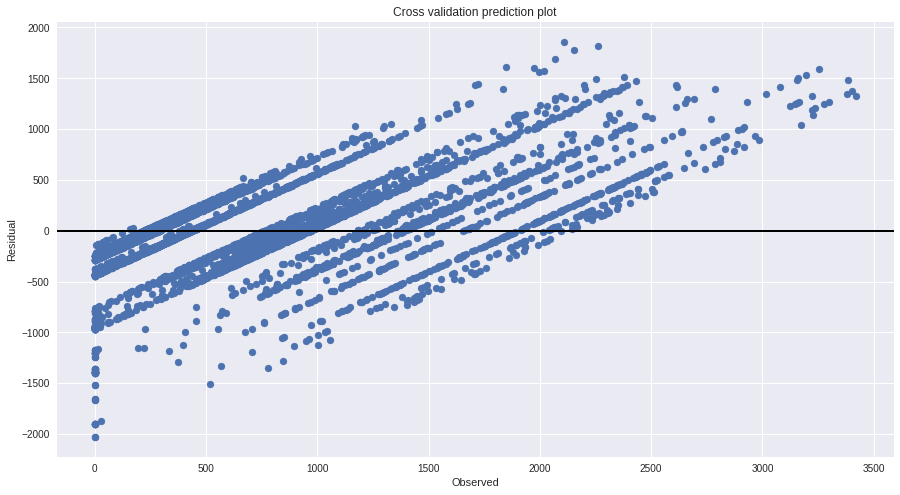

In [ ]:
# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

***Comment:- In this plot,some data points are have same finite variance between them and for some are not have it.***

### **Model evalution metrics-**

In [ ]:
#R-squared scores
r2_scores = cross_val_score(dtr, X_train, y_train, cv=5)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.6020087842627575


***Comment:-The R-squared or coefficient of determination is 0.60 on average for 5-fold cross validation ,it means that predictor is only able to predict 60% of the variance in the target variable which is contributed by independent variables.***

### **Model performance on test dataset-**

In [ ]:
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([963.30265487, 963.30265487, 963.30265487, ..., 783.57016435,
       225.21077441, 225.21077441])

In [ ]:
import math
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 400.34992207593876
Mean absolute error : 273.8602510852632


Residual plot


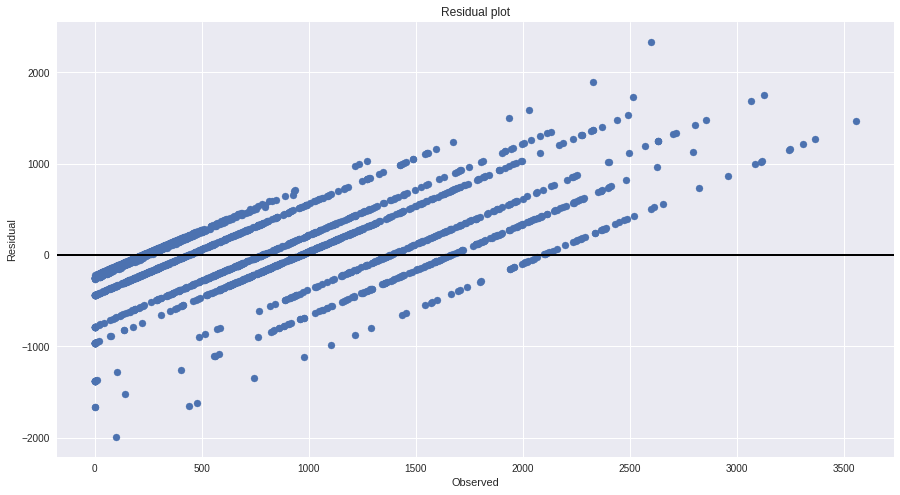

In [ ]:
#Residual scatter plot
residuals = y_test-dtr_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

***Comment:-In this plot, some data points are have same finite variance between them and for some are not have it***

***Comment:- In Decision Tree Regressor, the accuracy of the model is 62% i.e.increase by 30% as compare to regression model(linear & lasso)***

### RANDOM FOREST REGRESSOR MODEL

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")
print('Metrics for test data set :',)
#accuracy of the model
rf_score =model.score(X_test,y_test)
print('Accuracy of the model :',rf_score)
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

RandomForestRegressor() 

Metrics for test data set :
Accuracy of the model : 0.8085336807163822
MSE: 78461.00333108829
RMSE: 280.1089133374522
R2: 0.8085336807163822


In [ ]:
print('Metrics for train data set :',)
#accuracy of the model
rf_score =model.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

# Evaluate the model using the train data

mse = mean_squared_error(y_train,predict_train)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_train,predict_train)
print(f'R2: {r2}')

Metrics for train data set :
Accuracy of the model : 0.9729460547047836
MSE: 214442.27946279573
RMSE: 463.0791287272573
R2: 0.4877287578721502


In [ ]:
#Cross validation prediction
predict=cross_val_predict(model,X_train,y_train,cv=5)
predict

array([  37.7 ,  227.43,  807.99, ..., 1100.27,  299.26, 1234.72])

Polynomial function:  
0.79 x + 142.6


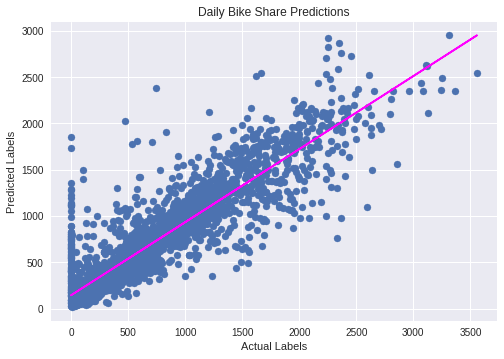

In [ ]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

### **Let's try some Hyperparameter Tunning-**

In [ ]:
n_estimators= [150,200,15]
max_depth = [25,35,1]
min_samples_split = [2,5,1]
min_samples_leaf = [1,5,1]
max_features= [4,10,1]

In [ ]:
random_grid = {'n_estimators' : n_estimators,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'max_features' : max_features}

print(random_grid)              

{'n_estimators': [150, 200, 15], 'max_depth': [25, 35, 1], 'min_samples_split': [2, 5, 1], 'min_samples_leaf': [1, 5, 1], 'max_features': [4, 10, 1]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid = RandomizedSearchCV(estimator= model , param_distributions= random_grid , cv = 5, n_iter= 50 , n_jobs = -1,  verbose = 1)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_
print(f' Train Accuracy : {rf_grid.score(X_train,y_train):.3f}')
print(f' Test Accuracy : {rf_grid.score(X_test,y_test):.3f}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
 Train Accuracy : 0.975
 Test Accuracy : 0.812


***Comment:- The effect of hyperparameter tunning on random forest regressor model is better though model fitted is best because it gives the accuracy score for train data set 98% and test data set 81%.Their is not huge difference to predict the accuracy score of dataset.***

### GRADIENT BOOSTING REGRESSOR

In [ ]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a  model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

print('Metrics for test data set :',)
#accuracy of the model
rf_score =model.score(X_test,y_test)
print('Accuracy of the model :',rf_score)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')


GradientBoostingRegressor() 

Metrics for test data set :
Accuracy of the model : 0.7661066143027082
MSE: 95847.19538651998
RMSE: 309.5919821095501
R2: 0.7661066143027082


In [ ]:
print('Metrics for train data set :',)
#accuracy of the model
rf_score =model.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

# Evaluate the model using the train data
mse = mean_squared_error(y_train,predict_train)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_train,predict_train)
print(f'R2: {r2}')


Metrics for train data set :
Accuracy of the model : 0.7878495248841322
MSE: 214442.27946279573
RMSE: 463.0791287272573
R2: 0.4877287578721502


In [ ]:
#Cross validation prediction
predict=cross_val_predict(model,X_train,y_train,cv=5)
predict

array([  -3.34038967,  230.02325896,  484.91995968, ...,  986.77096843,
        291.3120962 , 1536.61927101])

Polynomial function:  
0.7333 x + 180


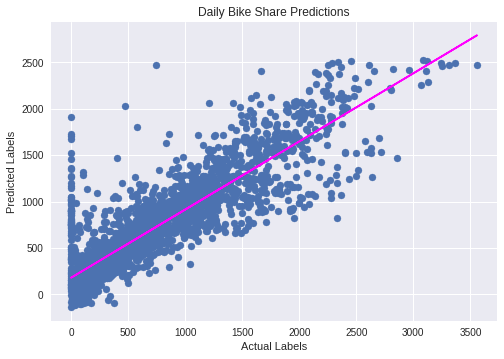

In [ ]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

# Optimize Hyperparameters


Let's try using a grid search approach to try combinations from a grid of possible values for the learning_rate and n_estimators  hyperparameters of the GradientBoostingRegressor estimator.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Trying these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [60, 120, 155]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

Best parameter combination: {'learning_rate': 0.5, 'n_estimators': 155} 



In [ ]:
# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

print('Metrics for test data set :',)
#accuracy of the model
rf_score =model.score(X_test,y_test)
print('Accuracy of the model :',rf_score)

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


GradientBoostingRegressor(learning_rate=0.5, n_estimators=155) 

Metrics for test data set :
Accuracy of the model : 0.801272201198528
MSE: 81436.68579456651
RMSE: 285.37113693323386
R2: 0.801272201198528


In [ ]:
print('Metrics for train data set :',)
#accuracy of the model
rf_score =model.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

# Evaluate the model using the train data

mse = mean_squared_error(y_train,predict_train)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_train,predict_train)
print("R2:", r2)

Metrics for train data set :
Accuracy of the model : 0.899400969657659
MSE: 214442.27946279573
RMSE: 463.0791287272573
R2: 0.4877287578721502


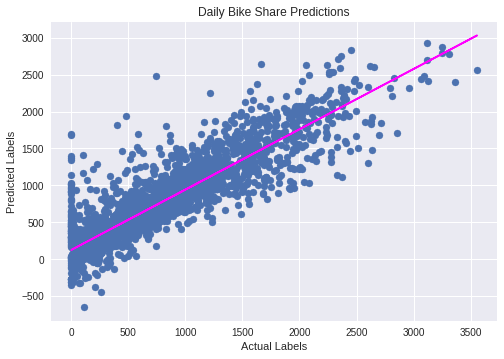

In [ ]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

***Comment:- We observe that , using hyperparameter tunning for Gradient Boosting Regressor was best idea.***

**Without Hyperparameter tunning-**

1.   Accuracy of the model of train data set is **79%**
2.   Accuracy of the model of test data set is  **77%**

**With Hyperparameter tunning-**

1.   Accuracy of the model of train data set is **90%**
2.   Accuracy of the model of test data set is  **80%**




### ***OVERALL CONCLUSION OF MODELS-***


*   We fitted the Linear Regression model, Lasso Regression model,Decision Tree regressor,Random Forest Regressor and Gradient Boosting Regressor models.
*   Overall we observe that,Linear Regression model and Lasso Regression model are worst fitted model as there accuracy is less than 50% whereas, Random Forest Regressor and Gradient Boosting Regressor are the best fitted model for the train and test data set.

*   Random Forest Regressor has the accuracy rate of train data set 98% and test data set 81%. Also,MSE is 463.08 for train data set and 280.61 for test data set. After,hyperparameter tunning the accuracy rate gives the similar result for train and test data set.
* Gradient Boosting Regressor has the accuracy rate of train data set 79% and test data set 77%. Also,MSE is 463.08 for train data set and 309.65 for test data set. With hyperparameter tunning the accuracy of the model increased and RMSE decreases which implies that the model fitted is the best model for higher accuracy rate of regression models with the predictions.

**With Hyperparameter tunning**-


1.  Accuracy of the model of train data set is 90%

2.  Accuracy of the model of test data set is 80%

3.  RMSE of the model of train data set is 463.08 

4.   RMSE of the model of test data set is 285.46


*   **Among, all the above models we conclude that Gradient Boosting Regressor(With hyperparameter tunning) is the best fitted model for Seoul Bike Rental Prediction data set.**














